<a href="https://colab.research.google.com/github/kruthika8/Codsoft/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [19]:
#load dataset
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('IMDb Movies India (2).csv', encoding='latin1')
df.head()



Saving IMDb Movies India.csv to IMDb Movies India (6).csv


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [14]:
#explore the data
df.shape  # rows and columns
df.info() # datatypes and missing values
df.describe() # numeric summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [16]:
#checking the missing values
df.isnull().sum()


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [23]:
df = df.dropna(subset=['Rating'])  # drop rows where rating is missing
df = df.fillna('Unknown')          # fill missing text fields


In [47]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df['Genre']=LabelEncoder.fit_transform(df['Genre'])

In [28]:
df = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']]




In [29]:
df.columns


Index(['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating'], dtype='object')

categorical data

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Genre'] = le.fit_transform(df['Genre'])
df['Director'] = le.fit_transform(df['Director'])
df['Actor 1'] = le.fit_transform(df['Actor 1'])
df['Actor 2'] = le.fit_transform(df['Actor 2'])
df['Actor 3'] = le.fit_transform(df['Actor 3'])


/tmp/ipython-input-1917738915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre'] = le.fit_transform(df['Genre'])
/tmp/ipython-input-1917738915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Director'] = le.fit_transform(df['Director'])
/tmp/ipython-input-1917738915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [33]:
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']


In [34]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
#Train the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
#make predictions
y_pred = model.predict(X_test)


In [37]:
#evaluate model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.035450225863035256
Mean Absolute Error: 1.077955716107759
Mean Squared Error: 1.793238025494594


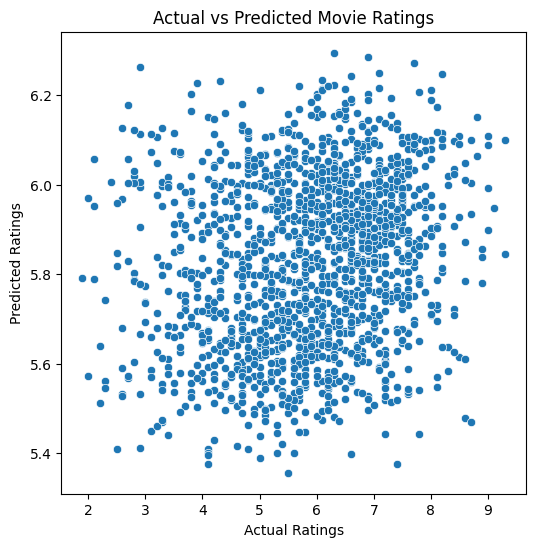

In [38]:
#visualize results
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("R² Score (Random Forest):", r2_score(y_test, rf_pred))


R² Score (Random Forest): 0.11379742465064835


In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


R² Score: 0.035450225863035256
Mean Absolute Error (MAE): 1.077955716107759
Root Mean Squared Error (RMSE): 1.3391183762067467


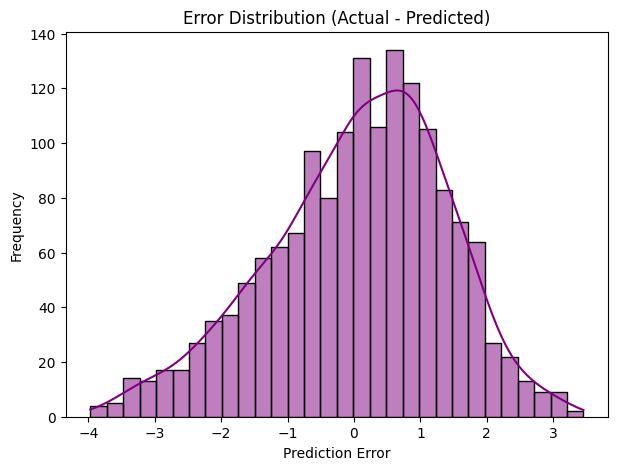

In [49]:
errors = y_test - y_pred

plt.figure(figsize=(7,5))
sns.histplot(errors, bins=30, kde=True, color='purple')
plt.title("Error Distribution (Actual - Predicted)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-3450473781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeff.values, y=coeff.index, palette="crest")


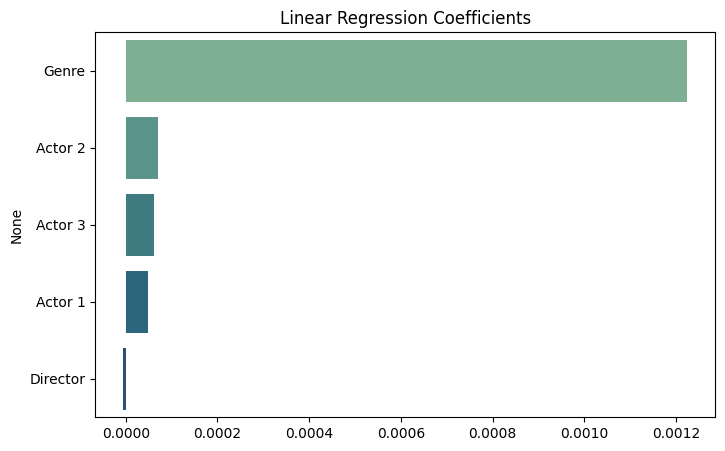

In [51]:
coeff = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=coeff.values, y=coeff.index, palette="crest")
plt.title("Linear Regression Coefficients")
plt.show()



In [53]:
from google.colab import auth
auth.authenticate_user()
!git config --global user.name "kruthika8"
!git config --global user.email "kruthikakruthi865@gmail.com"
!git clone https://github.com/kruthika8/movie-rating-prediction

Cloning into 'movie-rating-prediction'...
